In [4]:
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
oliv = datasets.fetch_olivetti_faces()

In [8]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [10]:
oliv['data'].shape

(400, 4096)

In [11]:
oliv['images'].shape

(400, 64, 64)

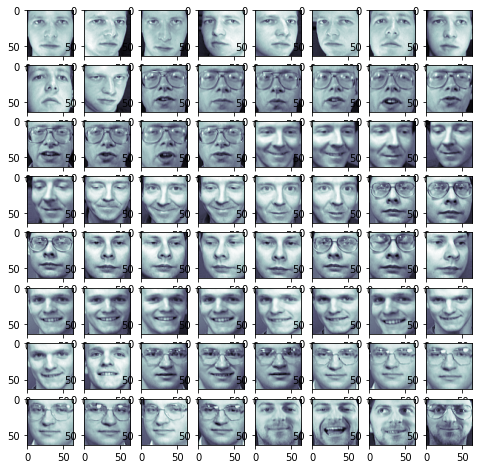

In [14]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i + 1)
    ax.imshow(oli.images[i] , cmap = plt.cm.bone)
plt.show()

In [59]:
x = oliv.data
y = oliv.target

In [62]:
x.shape

(400, 4096)

In [41]:
pca = PCA()
pca.fit(x)

PCA()

In [37]:
pca.components_.shape

(400, 4096)

In [43]:
k = 0
total = sum(pca.explained_variance_)
currentsum = 0
while currentsum/total < 0.95:
    currentsum += pca.explained_variance_[k]
    k = k+1
k

123

In [45]:
pca2 = PCA(n_components = k , whiten = True)
transformed_data = pca2.fit_transform(x)
transformed_data.shape


(400, 123)

# Reproducing Image

In [47]:
x_approx = pca2.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [48]:
x_approx_images = x_approx.reshape((400,64,64))

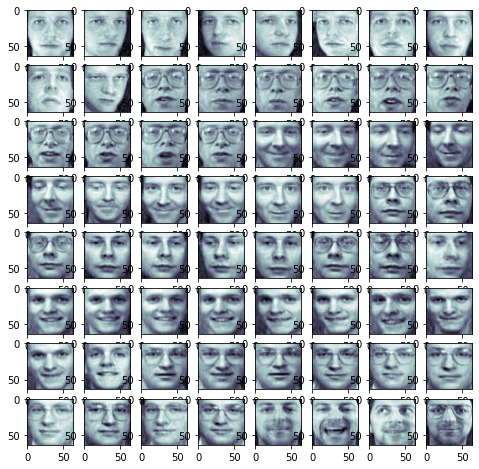

In [50]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i + 1)
    ax.imshow(x_approx_images[i] , cmap = plt.cm.bone)
plt.show()


In [56]:
eigenv = pca2.components_
eigenv.shape

(123, 4096)

In [57]:
eigenfaces = eigenv.reshape((123,64,64))

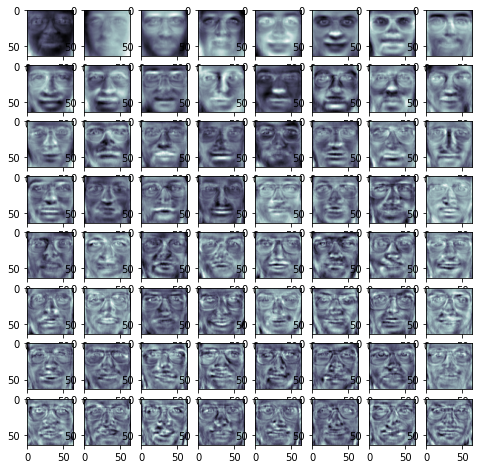

In [58]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i + 1)
    ax.imshow(eigenfaces[i] , cmap = plt.cm.bone)
plt.show()
